<a href="https://colab.research.google.com/github/cmoore102589/ai-data-science-portfolio/blob/main/Reinforcement%20Learning/Lab_04_MMoore25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-635: Lab 4

**Matthew Corley Moore**

[PLACEHOLDER_FOR_NOTEBOOK_LINK]


## Getting Started

Follow the instructions below to copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (435 or 635) and by replacing "Student Name" with your actual name.
5. Do not edit the line that says `PLACEHOLDER_FOR_NOTEBOOK_LINK`. This will be used by the [notebook renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool to insert a link to your Colab notebook.
6. Enable link sharing for your notebook.

## Preparing the Colab Environment

Run the cell below to install gymnasium and to download rltools to the virtual machine. This cell will also download csv files for two datasets used in this lab.

In [ ]:
%%capture
!pip install gymnasium==0.28.1
!rm rltools -r
!git clone https://github.com/drbeane/rltools.git
!wget -nc https://raw.githubusercontent.com/drbeane/dsci_408/main/data/forest_cover.csv
!wget -nc https://github.com/drbeane/datasets/raw/d861b43747ebc7fcd91274e88db0cd7a0827558f/fashion-mnist_train.csv.zip
!unzip -n fashion-mnist_train.csv.zip

The cell below includes the import statements that you will need for this assignmnet. No other import statements should be added anywhere in the notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from rltools.nnet import NNet

import torch
import torch.nn as nn
import torch.nn.functional as F

## Note on Variable Names

You are free to select the variable names for the objects that you create in this notebook. But please make sure that the variable names you select in each part are distinct from those in other parts. An exception to this rule can be made in instances where a particular variable will be used in a single cell, but no where else in the notebook.

## GPU Acceleration

GPU acceleration will be needed for some parts of this assignment. Specifically, you will need to use a GPU to run the code in 3.B in a reasonable amount of time. The rest of the notebook, however, can be run on CPU with no issues.

Google Colab provides free GPU access, but this usage is subject to a daily limit. In order to preserve your GPU hours, I would recommend not enabling the GPU until you are ready to run code in 3.B.

The GPU can be enabled by going to `Runtime > Change runtime type`. You should have `T4 GPU` selected.

# Part 1 - Forest Cover Dataset

In Part 1 of this assignment, you will build a simple ANN to create a classification model for the [Forest Cover Dataset](https://www.kaggle.com/competitions/forest-cover-type-prediction).

## 1.A - Load the Dataset

Use the cell below to load the file `forest_cover.csv` into a Pandas DataFrame. Then use the `sample()` method to shuffle the DataFrame, setting `random_state=1`. Print the shape of the shuffled DataFrame and then display its head.

In [ ]:
df = pd.read_csv('forest_cover.csv')
df = df.sample(frac = 1,random_state=1)
print(df.shape)
df.head()

(15120, 13)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
5765,2489,333,18,124,39,458,176,214,176,1409,Cache la Poudre,10,6
11340,2696,4,13,30,10,2800,202,214,148,6524,Rawah,29,1
9270,3413,140,17,134,6,4271,243,233,113,4272,Comanche Peak,23,7
5710,2874,116,18,153,17,2379,248,220,94,564,Comanche Peak,13,5
1070,3001,57,18,180,28,4673,229,200,97,1864,Rawah,29,1


## 1.B - Create Feature and Label Arrays

This dataset contains 10 numerical features, two categorical features, and a single label. The first 10 columns of the dataset represent the numerical features. The next two columns, named `Wilderness_Area` and `Soil_Type`, represent the categorical features. The final column, `Cover_Type`, provides the integer-encoded labels. We will ignore the categorical features for this assignment.

In the cell below, create a feature array and a label array. The feature array should contains only the 10 numerical features.

The labels are encoded using integers 1 - 7, but they need to be encoded using integers 0 - 6. When creating the label array, please subtract 1 from all of the label values.

After creating the two arrays, print the shape of each array.


In [ ]:
X = df.iloc[:, :10].values
y = df['Cover_Type'].values - 1
print("Shape of the feautre array:", X.shape)
print("Shape of the label array:", y.shape)

Shape of the feautre array: (15120, 10)
Shape of the label array: (15120,)


## 1.C - Build and Train the Model

Use `nn.Sequential` to construct a neural network for use with this problem. You can use `Linear` and `ReLu` layers for this part. You can select any architecture you would like, as long as you meet the goal described below. Wrap your network using the `NNet` class provided in the course module.

After creating the model, call the `train_model()` method to train the model on the forest cover data. Set `val_split=0.2` and `seed=1`. Select values the `epochs`, `batch_size`, `lr`, and `updates`, parameters.

To limit the number of lines of ouput displayed to fewer than 100, please select a value for `updates` that is not less than `epochs / 100`.

Your goal is to reach a final validation accuracy of **at least 0.7**. To show that your model is relatively stable, your validation accuracy should be above this threshold for the last several training epochs. Adjust the training parameters until this goal is met.

In [ ]:
model = nn.Sequential(
    nn.Linear(10, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32)
)

model = NNet(model)

model.train_model(X,y, epochs = 600, batch_size = 50, lr = 0.001, val_split = 0.2, seed = 1, updates = 50)

Epoch 50: Training loss: 0.7423, Training Acc: 0.6916, Val Loss: 0.8584, Val Acc 0.6419
Epoch 100: Training loss: 0.5917, Training Acc: 0.7576, Val Loss: 0.6533, Val Acc 0.7295
Epoch 150: Training loss: 0.5330, Training Acc: 0.7817, Val Loss: 0.6308, Val Acc 0.7454
Epoch 200: Training loss: 0.4886, Training Acc: 0.8003, Val Loss: 0.6631, Val Acc 0.7467
Epoch 250: Training loss: 0.4757, Training Acc: 0.8033, Val Loss: 0.6358, Val Acc 0.7507
Epoch 300: Training loss: 0.4574, Training Acc: 0.8143, Val Loss: 0.6562, Val Acc 0.7622
Epoch 350: Training loss: 0.4550, Training Acc: 0.8161, Val Loss: 0.6452, Val Acc 0.7540
Epoch 400: Training loss: 0.4317, Training Acc: 0.8275, Val Loss: 0.6305, Val Acc 0.7566
Epoch 450: Training loss: 0.4438, Training Acc: 0.8204, Val Loss: 0.7090, Val Acc 0.7378
Epoch 500: Training loss: 0.4165, Training Acc: 0.8279, Val Loss: 0.6454, Val Acc 0.7669
Epoch 550: Training loss: 0.4207, Training Acc: 0.8273, Val Loss: 0.7317, Val Acc 0.7384
Epoch 600: Training lo

## 1.D - Display the Training Curves

Call the `training_curves()` method to display the training curves for your model.

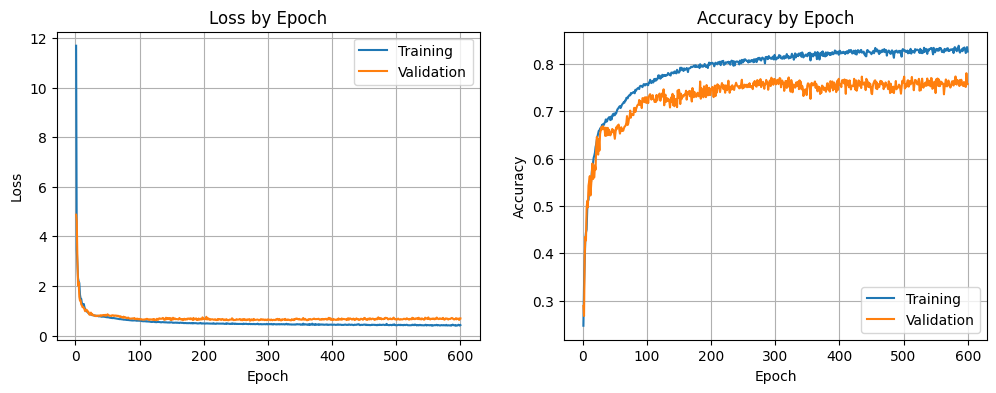

In [ ]:
model.training_curves()

# Part 2 - Fashion MNIST (ANN)

In Parts 2 and 3 of this assignment, you will work with the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset. In Part 2, you will build a simple ANN to create a classification model for this dataset. In Part 3, you will build a CNN for this purpose.


## 2.A - Load the Dataset

Use the cell below to load the file `fasion-mnist_train.csv` into a Pandas DataFrame. Then use the `sample()` method to shuffle the DataFrame, setting `random_state=1`. Print the shape of the shuffled DataFrame and then display its head.

In [ ]:
df1 = pd.read_csv('fashion-mnist_train.csv')
df1 = df1.sample(frac = 1,random_state=1)
print(df1.shape)
df1.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15281,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21435,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44536,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13518,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47529,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.B - Create Feature and Label Arrays

This dataset contains 784 numerical features, which represent pixel values for 28x28 black-and-white images. The integer-encoded label indicates the class that each image belongs to.

In the cell below, create a feature array and a label array. The pixel values range from 0 to 255, but your models will learn more easily if these feature values are scaled to be betwen 0 and 1. To that end, please divide the values by 255 when creating the feature array.

Print the shape of each array.

In [ ]:
X = df1.iloc[:, 1:].values / 255
y = df1['label'].values
print("Shape of the feautre array:", X.shape)
print("Shape of the label array:", y.shape)

Shape of the feautre array: (60000, 784)
Shape of the label array: (60000,)


## 2.C - Build and Train the Model

Use `nn.Sequential` to construct a neural network for use with this problem. You can use `Linear` and `ReLu` layers for this part. You can select any architecture you would like, as long as you meet the goal described below. Wrap your network using the `NNet` class provided in the course module.

After creating the model, call the `train_model()` method to train the model on the Fashion MNIST data. Set `val_split=0.2` and `seed=1`. Select values the `epochs`, `batch_size`, `lr`, and `updates`, parameters.

To limit the number of lines of ouput displayed to fewer than 100, please select a value for `updates` that is not less than `epochs / 100`.

Your goal is to reach a final validation accuracy of **at least 0.87**. To show that your model is relatively stable, your validation accuracy should be above this threshold for the last several training epochs. Adjust the training parameters until this goal is met.

In [ ]:
model1 = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32)
)

model1 = NNet(model1)

model1.train_model(X,y, epochs = 300, batch_size = 128, lr = 0.00001, val_split = 0.2, seed = 1, updates = 15)


Epoch 15: Training loss: 0.7149, Training Acc: 0.7591, Val Loss: 0.7060, Val Acc 0.7622
Epoch 30: Training loss: 0.5580, Training Acc: 0.8086, Val Loss: 0.5593, Val Acc 0.8052
Epoch 45: Training loss: 0.5003, Training Acc: 0.8286, Val Loss: 0.5053, Val Acc 0.8243
Epoch 60: Training loss: 0.4675, Training Acc: 0.8390, Val Loss: 0.4749, Val Acc 0.8341
Epoch 75: Training loss: 0.4453, Training Acc: 0.8466, Val Loss: 0.4547, Val Acc 0.8408
Epoch 90: Training loss: 0.4285, Training Acc: 0.8517, Val Loss: 0.4396, Val Acc 0.8463
Epoch 105: Training loss: 0.4148, Training Acc: 0.8559, Val Loss: 0.4277, Val Acc 0.8511
Epoch 120: Training loss: 0.4033, Training Acc: 0.8600, Val Loss: 0.4177, Val Acc 0.8542
Epoch 135: Training loss: 0.3932, Training Acc: 0.8632, Val Loss: 0.4091, Val Acc 0.8573
Epoch 150: Training loss: 0.3843, Training Acc: 0.8658, Val Loss: 0.4017, Val Acc 0.8596
Epoch 165: Training loss: 0.3763, Training Acc: 0.8688, Val Loss: 0.3952, Val Acc 0.8627
Epoch 180: Training loss: 0

## 2.D - Display the Training Curves

Call the `training_curves()` method to display the training curves for your model.

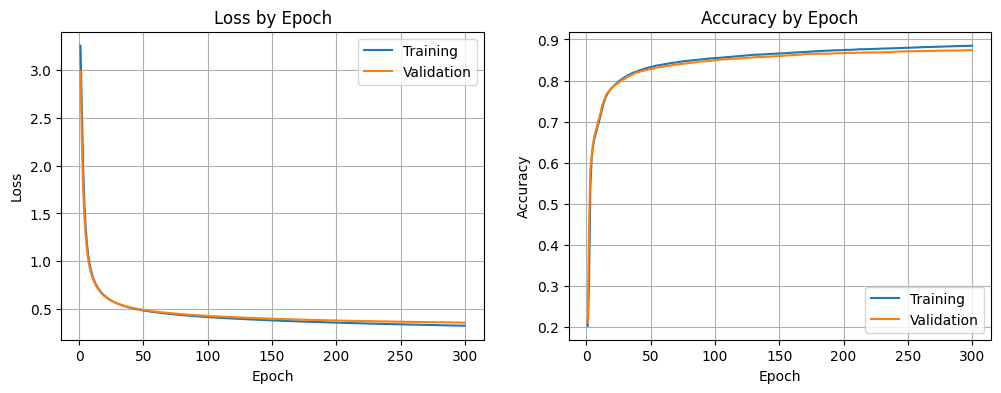

In [ ]:
model1.training_curves()

# Part 3 - Fashion MNIST (ANN)

In Part 3 of this assignment, you will build a CNN for the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset.


## 3.A - Reshape the Feature Array

Use the `reshape()` array method to reshape the feature array from Part 2 to have shape `(60000, 1, 28, 28)`. In this part, you will reuse the label array from Part 2. You can assign it to a new variable name, if you would like.

Print the shape of the feature array.

In [ ]:
X_reshaped = X.reshape(60000, 1, 28, 28)
print("Shape of the feautre array:", X_reshaped.shape)

Shape of the feautre array: (60000, 1, 28, 28)


## 3.B - Build and Train the Model

Use `nn.Sequential` to construct a neural network for use with this problem. You can use `Conv2d`, `MaxPool2d`, `Flatten`, `Linear` and `ReLu` layers for this part. You can select any architecture you would like, as long as you meet the goal described below. Wrap your network using the `NNet` class provided in the course module.

After creating the model, call the `train_model()` method to train the model on the Fashion MNIST data. Set `val_split=0.2` and `seed=1`. Select values the `epochs`, `batch_size`, `lr`, and `updates`, parameters.

To limit the number of lines of ouput displayed to fewer than 100, please select a value for `updates` that is not less than `epochs / 100`.

Your goal is to reach a final validation accuracy of **at least 0.91**. To show that your model is relatively stable, your validation accuracy should be above this threshold for the last several training epochs. Adjust the training parameters until this goal is met.

In [ ]:
model2 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(128 * 7 * 7, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

model2 = NNet(model2)

model2.train_model(X_reshaped, y, epochs = 200, batch_size = 128, lr = 0.00001, val_split=0.2, seed=1, updates = 10)

Epoch 10: Training loss: 0.4709, Training Acc: 0.8350, Val Loss: 0.4653, Val Acc 0.8333
Epoch 20: Training loss: 0.3938, Training Acc: 0.8628, Val Loss: 0.3976, Val Acc 0.8559
Epoch 30: Training loss: 0.3580, Training Acc: 0.8749, Val Loss: 0.3662, Val Acc 0.8678
Epoch 40: Training loss: 0.3344, Training Acc: 0.8824, Val Loss: 0.3455, Val Acc 0.8763
Epoch 50: Training loss: 0.3166, Training Acc: 0.8894, Val Loss: 0.3302, Val Acc 0.8828
Epoch 60: Training loss: 0.3023, Training Acc: 0.8939, Val Loss: 0.3180, Val Acc 0.8864
Epoch 70: Training loss: 0.2903, Training Acc: 0.8977, Val Loss: 0.3079, Val Acc 0.8895
Epoch 80: Training loss: 0.2799, Training Acc: 0.9010, Val Loss: 0.2995, Val Acc 0.8927
Epoch 90: Training loss: 0.2709, Training Acc: 0.9042, Val Loss: 0.2925, Val Acc 0.8955
Epoch 100: Training loss: 0.2629, Training Acc: 0.9071, Val Loss: 0.2865, Val Acc 0.8988
Epoch 110: Training loss: 0.2556, Training Acc: 0.9096, Val Loss: 0.2810, Val Acc 0.9008
Epoch 120: Training loss: 0.24

## 3.C - Display the Training Curves

Call the `training_curves()` method to display the training curves for your model.

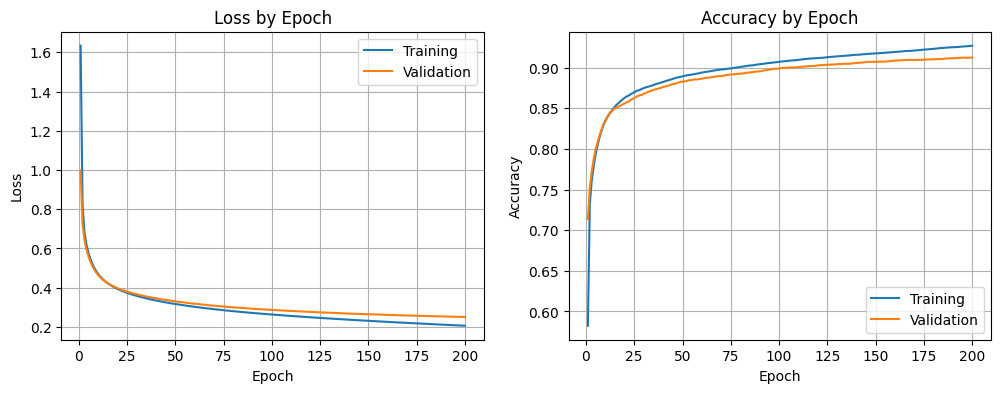

In [ ]:
model2.training_curves()

# Submission Instructions

1. Perform a Restart and Run All by clicking **Runtime > Restart session and run all**.
2. Copy the link to your notebook by clicking **Share > Copy Link**.
3. Paste the copied link into the `notebook_url` field in the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool and then execute the cell to render the notebook.
4. The Notebook Renderer will open up a save file dialog. Save the resulting HTML file yo your local machine.
5. Submit the HTML file to Canvas.
